## Investigation of data using Python

In [1]:
import pysam
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
one_sample= [
    '/Users/famke/01-ghga-project/homogeneous-data-processing/variantcalling/TCGA-CHOL/tcga-data/mutect-maf-pass/8a26ce0b-6638-4ce0-8c5a-ce78b76adbe6.wxs.MuTect2.aliquot.pass.maf',
    '/Users/famke/01-ghga-project/homogeneous-data-processing/variantcalling/TCGA-CHOL/tcga-data/pindel-varscan-maf-pass/9c733e94-6840-4621-8aa2-84fcaebe9f0a.wxs.Pindel.aliquot.pass.maf',
    '/Users/famke/01-ghga-project/homogeneous-data-processing/variantcalling/TCGA-CHOL/tcga-data/pindel-varscan-maf-pass/a2c4ebd6-65b1-404d-b631-a516f64bcab7.wxs.VarScan2.aliquot.pass.maf',
    '/Users/famke/01-ghga-project/homogeneous-data-processing/variantcalling/TCGA-CHOL/tcga-data/muse-maf-pass/ce9916ba-4554-4c6d-8e30-dd2c30eb6624.wxs.MuSE.aliquot.pass.maf',
    '/Users/famke/01-ghga-project/homogeneous-data-processing/variantcalling/TCGA-CHOL/vcftomaf/results/TCGA-W5-AA39_mutect2.maf',
    '/Users/famke/01-ghga-project/homogeneous-data-processing/variantcalling/TCGA-CHOL/vcftomaf/results/TCGA-W5-AA39_strelka_indel.maf',
    '/Users/famke/01-ghga-project/homogeneous-data-processing/variantcalling/TCGA-CHOL/vcftomaf/results/TCGA-W5-AA39_strelka_snv.maf'
]

In [3]:
# Read the MAF files into DataFrames
# Read the MAF files into DataFrames
# Define a function to extract the caller from the file path
def extract_caller(file_path):
    if '.mutect' in file_path.lower():
        return 'TCGA-MuTect2'
    elif '_mutect' in file_path.lower():
        return 'Sarek-MuTect2'
    elif 'pindel' in file_path.lower():
        return 'TCGA-Pindel'
    elif 'varscan' in file_path.lower():
        return 'TCGA-VarScan2'
    elif 'muse' in file_path.lower():
        return 'TCGA-MuSE'
    elif 'strelka' in file_path.lower():
        return 'Sarek-Strelka'
    else:
        return 'Unknown'

# Read the MAF files into DataFrames and add the caller information
maf_dfs = []
for file in one_sample:
    df = pd.read_csv(file, sep='\t', comment='#')
    df['Caller'] = extract_caller(file)
    maf_dfs.append(df)


# Concatenate all DataFrames into a single DataFrame
maf_df = pd.concat(maf_dfs, ignore_index=True)
maf_df

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,t_aaref,n_aaref,t_aaalt,n_aaalt,t_aapos,n_aapos,t_VEP_canonical,n_VEP_canonical,t_MutPred_AAchange,n_MutPred_AAchange
0,AL627309.1,0,WUGSC,GRCh38,chr1,120883,120883,+,RNA,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CPTP,80772,WUGSC,GRCh38,chr1,1326498,1326498,+,Intron,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GNB1,2782,WUGSC,GRCh38,chr1,1789273,1789273,+,Splice_Region,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PRDM16,63976,WUGSC,GRCh38,chr1,3069227,3069227,+,5'UTR,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C1orf174,339448,WUGSC,GRCh38,chr1,3891034,3891034,+,Silent,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12180,PDZD4,0,.,hg38,chrX,153805024,153805024,+,Intron,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12181,GAB3,0,.,hg38,chrX,154697088,154697088,+,Intron,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12182,GAB3,0,.,hg38,chrX,154716236,154716236,+,Missense_Mutation,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12183,CMC4,0,.,hg38,chrX,155065458,155065458,+,Intron,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Count the number of mutations per gene
by_caller = maf_df[maf_df['Caller'] == 'TCGA-Pindel']
mutation_counts = by_caller['Hugo_Symbol'].value_counts()

# Display the top 10 genes with the most mutations
print(mutation_counts.head(10))

Hugo_Symbol
Unknown    37
LAMB3       7
APBB3       5
DIP2C       5
APOB        5
FCGR1B      5
STAT1       4
PCF11       4
CTNNA3      4
ITGB4       4
Name: count, dtype: int64


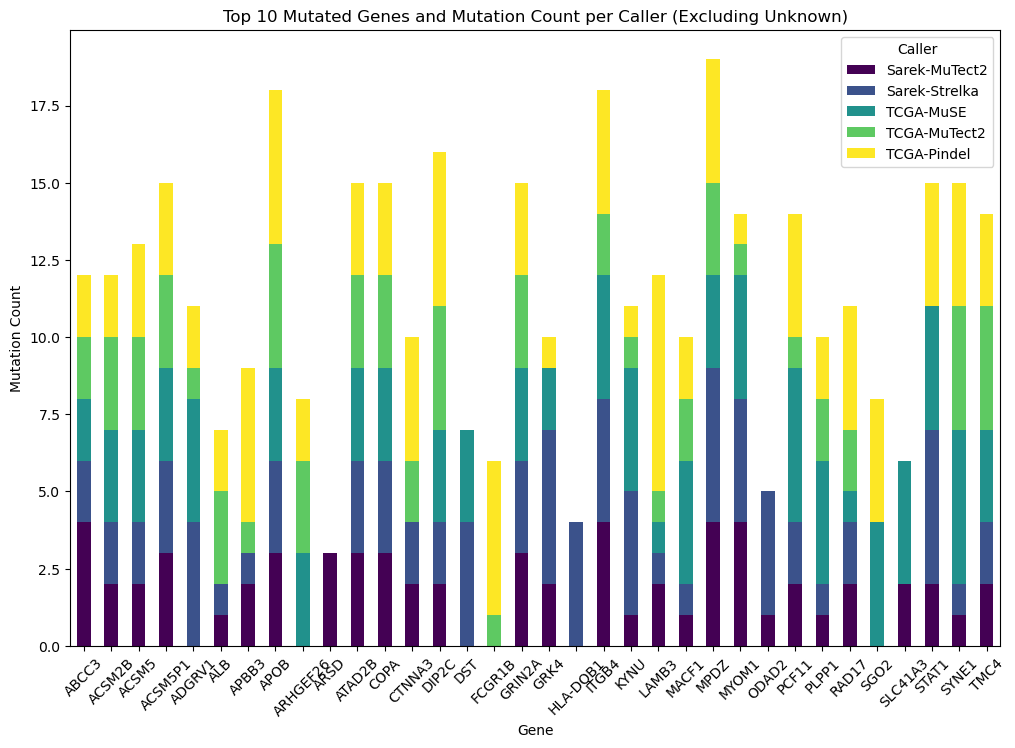

In [13]:
maf_df = maf_df[maf_df['Hugo_Symbol'] != 'Unknown']

# Aggregate mutation counts by gene and caller
mutation_counts = maf_df.groupby(['Hugo_Symbol', 'Caller']).size().reset_index(name='Mutation_Count')

# Identify the top 10 mutated genes
top_genes = mutation_counts.groupby(['Caller', 'Hugo_Symbol'])['Mutation_Count'].sum().groupby(level=0, group_keys=False).nlargest(10).reset_index(level=0, drop=True).index.get_level_values('Hugo_Symbol').unique()

# Filter the DataFrame to include only the top 10 genes
top_mutation_counts = mutation_counts[mutation_counts['Hugo_Symbol'].isin(top_genes)]

# Pivot the DataFrame for plotting
pivot_df = top_mutation_counts.pivot(index='Hugo_Symbol', columns='Caller', values='Mutation_Count').fillna(0)

# Plot the stacked bar plot
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.xlabel('Gene')
plt.ylabel('Mutation Count')
plt.title('Top 10 Mutated Genes and Mutation Count per Caller (Excluding Unknown)')
plt.legend(title='Caller')
plt.xticks(rotation=45)
plt.show()

## All samples

In [14]:
all_csvs = [
    '/Users/famke/01-ghga-project/homogeneous-data-processing/variantcalling/TCGA-CHOL/sarek_strelka_samples.csv',
    '/Users/famke/01-ghga-project/homogeneous-data-processing/variantcalling/TCGA-CHOL/sarek_mutect_samples.csv',
    '/Users/famke/01-ghga-project/homogeneous-data-processing/variantcalling/TCGA-CHOL/tcga_mutect_samples.csv',
    '/Users/famke/01-ghga-project/homogeneous-data-processing/variantcalling/TCGA-CHOL/tcga_pindel_samples.csv',
    '/Users/famke/01-ghga-project/homogeneous-data-processing/variantcalling/TCGA-CHOL/tcga_varscan_samples.csv',
    '/Users/famke/01-ghga-project/homogeneous-data-processing/variantcalling/TCGA-CHOL/tcga_muse_samples.csv'
]
def read_mafs(csv_file):
    # Read the CSV file to get the file paths
    maf_files = pd.read_csv(csv_file)['filepath']
    
    # Read each MAF file into a DataFrame
    mafs = [pd.read_csv(maf_file, sep='\t', comment='#') for maf_file in maf_files]
    
    # Merge the MAF DataFrames
    merged_mafs = pd.concat(mafs, ignore_index=True)
    
    return merged_mafs

In [18]:
# Create a big dataframe from the list of dataframes
big_df = pd.concat([read_mafs(csv).assign(caller=csv.split('/')[-1].split('_')[1], pipe=csv.split('/')[-1].split('_')[0]) for csv in all_csvs], ignore_index=True)

0    strelka
1    strelka
2    strelka
3    strelka
4    strelka
Name: caller, dtype: object

In [20]:
# Display the first few rows of the big dataframe
big_df.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,normal_bam_uuid,case_id,GDC_FILTER,COSMIC,hotspot,vcf_region,vcf_info,vcf_format,vcf_tumor_gt,vcf_normal_gt
0,SCNN1D,0,.,hg38,chr1,1287039,1287039,+,Intron,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TMEM88B,0,.,hg38,chr1,1426238,1426238,+,Silent,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PLCH2,0,.,hg38,chr1,2489379,2489379,+,Splice_Site,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PRDM16,0,.,hg38,chr1,3067526,3067526,+,5'Flank,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARHGEF16,0,.,hg38,chr1,3475983,3475983,+,Missense_Mutation,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Aggregate mutation counts by pipe and caller
mutation_counts_pipe_caller = big_df.groupby(['pipe', 'caller']).size().reset_index(name='Mutation_Count')

# Display the mutation counts
print(mutation_counts_pipe_caller)

    pipe   caller  Mutation_Count
0  sarek   mutect           28407
1  sarek  strelka           35467
2   tcga     muse           10861
3   tcga   mutect           14106
4   tcga   pindel            5240
5   tcga  varscan           19103


### Chromosome level

In [63]:
# Aggregate mutation counts by gene, pipe, and caller
chrom = big_df.groupby(['pipe', 'caller', 'Chromosome']).size().reset_index(name='Mutation_Count')
chrom = chrom[~chrom['Chromosome'].str.contains('_random|chrUn|chrM')]
chrom['Chromosome'].unique()

array(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21',
       'chr22', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9',
       'chrX', 'chrY'], dtype=object)

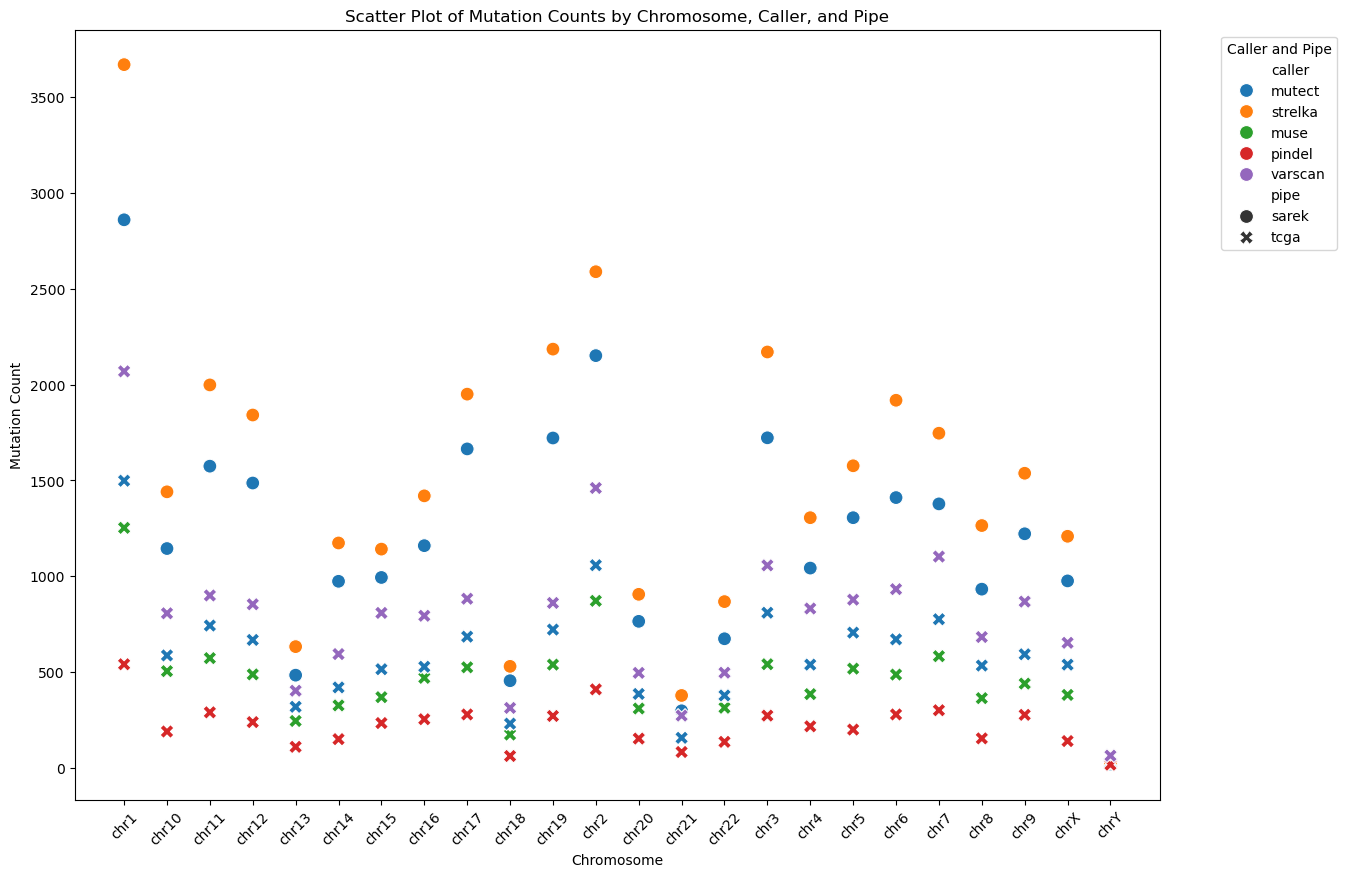

In [73]:
# Plot the mutation count by chromosome as scatter plot
plt.figure(figsize=(14, 10))
sns.scatterplot(data=chrom, x='Chromosome', y='Mutation_Count', hue='caller', style='pipe', s=100)
plt.title('Scatter Plot of Mutation Counts by Chromosome, Caller, and Pipe')
plt.xlabel('Chromosome')
plt.ylabel('Mutation Count')
plt.xticks(rotation=45)
plt.legend(title='Caller and Pipe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Gene level

In [92]:
# Aggregate mutation counts by gene, pipe, and caller
mutation_counts_pipe_caller_gene = big_df.groupby(['pipe', 'caller', 'Hugo_Symbol', 'Chromosome']).size().reset_index(name='Mutation_Count')
# Identify the top mutated genes per pipe and caller
genes = mutation_counts_pipe_caller_gene.groupby(['pipe', 'caller', 'Hugo_Symbol', 'Chromosome'])['Mutation_Count'].sum().reset_index()
top_genes_per_caller = genes.groupby(['pipe', 'caller'])['Mutation_Count'].nlargest(10).reset_index(level=2, drop=True).reset_index()

In [93]:
len(genes['Hugo_Symbol'].unique())

19109

In [98]:
# Get the list of unique callers
genes = genes[genes['Hugo_Symbol'] != 'Unknown']
callers = genes['caller'].unique()

# Get the genes reported by all callers
genes_reported_by_all_callers = genes.groupby('Hugo_Symbol').filter(lambda x: set(callers).issubset(set(x['caller'])))

# Display the result
genes_reported_by_all_callers

,pipe,caller,Hugo_Symbol,Chromosome,Mutation_Count
10,sarek,mutect,AAK1,chr2,6
20,sarek,mutect,ABCA10,chr17,2
21,sarek,mutect,ABCA12,chr2,1
22,sarek,mutect,ABCA13,chr7,9
24,sarek,mutect,ABCA2,chr9,10
...,...,...,...,...,...
56629,tcga,varscan,ZNF91,chr19,6
56635,tcga,varscan,ZNFX1,chr20,2
56642,tcga,varscan,ZPR1,chr11,1
56644,tcga,varscan,ZRANB3,chr2,4


In [107]:
# Get the top 10 genes reported by all callers
top_10_genes_reported_by_all_callers = genes_reported_by_all_callers.groupby('Hugo_Symbol')['Mutation_Count'].sum().nlargest(20)

# Display the result
top_10_genes_reported_by_all_callers

Hugo_Symbol
TTN        146
MUC16      111
MUC4       106
SYNE1       89
MUC19       79
LRP1B       76
MACF1       70
HMCN1       67
NEB         64
BAP1        63
PBRM1       63
RYR2        63
MUC5B       62
PTPRN2      62
BIRC6       59
BAGE2       56
COL5A1      56
DNM1P47     56
CSF2RA      54
KMT2D       54
Name: Mutation_Count, dtype: int64

/var/folders/6r/tg5ddtfd68l0twgv17dznsj40000gp/T/ipykernel_72641/2246950903.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_genes_df['Hugo_Symbol'] = pd.Categorical(top_10_genes_df['Hugo_Symbol'], categories=top_10_genes, ordered=True)


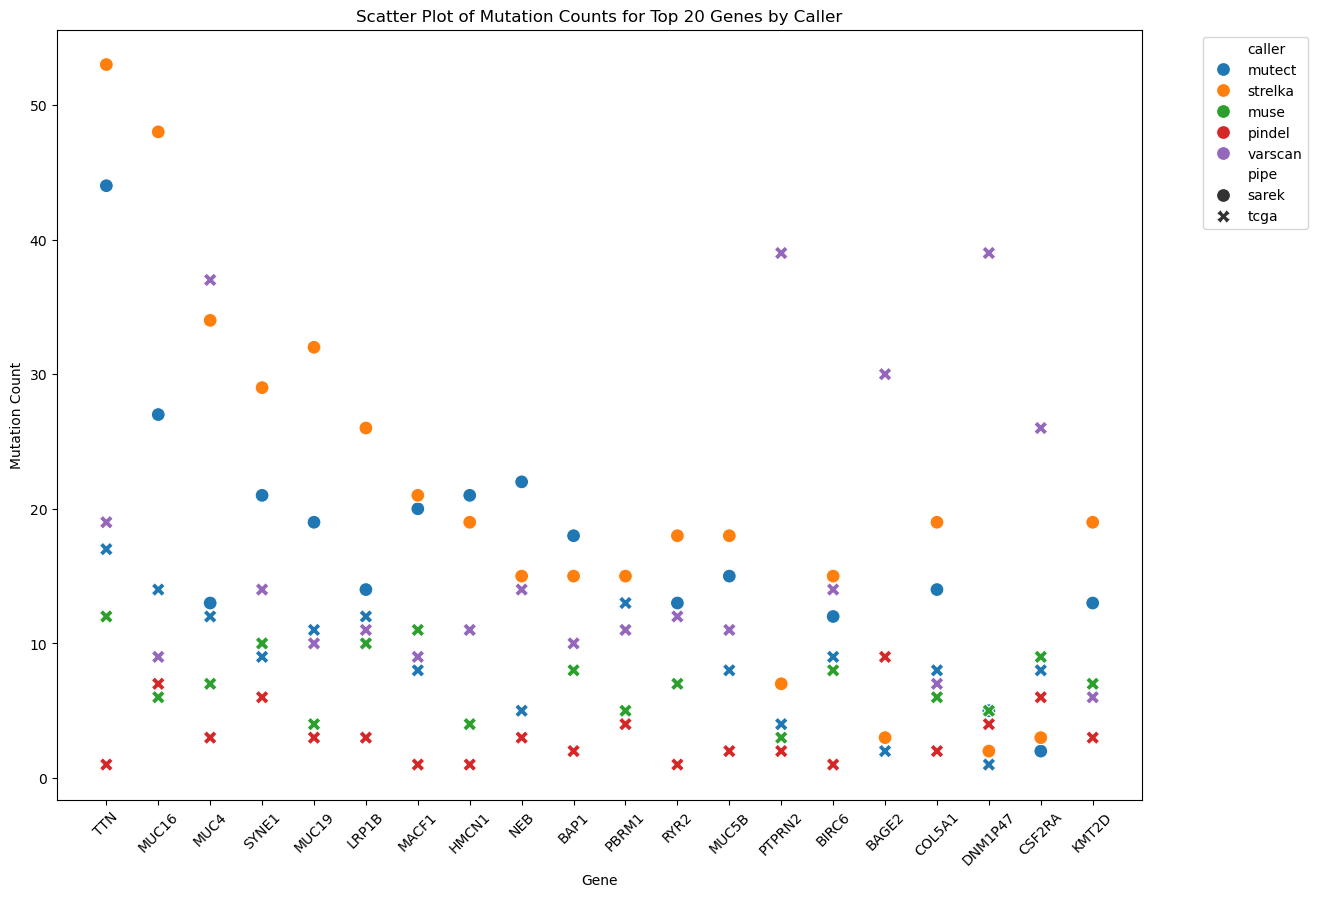

In [112]:
# Plot the top ten genes and their mutation count per caller in a scatterplot
top_10_genes = top_10_genes_reported_by_all_callers.index.tolist()
top_10_genes_df = genes[genes['Hugo_Symbol'].isin(top_10_genes)]
# Ensure the order of genes in the plot reflects the order in top_10_genes
top_10_genes_df['Hugo_Symbol'] = pd.Categorical(top_10_genes_df['Hugo_Symbol'], categories=top_10_genes, ordered=True)

plt.figure(figsize=(14, 10))
sns.scatterplot(data=top_10_genes_df, x='Hugo_Symbol', y='Mutation_Count', hue='caller', style='pipe', s=100)
plt.title('Scatter Plot of Mutation Counts for Top 20 Genes by Caller')
plt.xlabel('Gene')
plt.ylabel('Mutation Count')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### consensus per pipe

In [119]:
sarek = genes[genes['pipe']=='sarek']
tcga = genes[genes['pipe']=='tcga']
tcga

,pipe,caller,Hugo_Symbol,Chromosome,Mutation_Count
26910,tcga,muse,5_8S_rRNA,chr20,3
26911,tcga,muse,A1BG,chr19,1
26912,tcga,muse,A1CF,chr10,3
26913,tcga,muse,A2MP1,chr12,1
26914,tcga,muse,AACSP1,chr5,2
...,...,...,...,...,...
56662,tcga,varscan,ZXDA,chrX,3
56663,tcga,varscan,ZXDB,chrX,1
56664,tcga,varscan,ZYG11B,chr1,2
56665,tcga,varscan,ZYX,chr7,2


In [130]:
callers = tcga['caller'].unique()
# Find genes that are reported by all callers
genes_reported_by_all_callers_tcga = tcga.groupby('Hugo_Symbol').filter(lambda x: set(callers).issubset(set(x['caller'])))
top_20_genes_tcga = genes_reported_by_all_callers_tcga.groupby('Hugo_Symbol')['Mutation_Count'].sum().nlargest(20)
top_20_genes_tcga

Hugo_Symbol
MUC4          59
MT-ND1        58
BAGE2         50
CSF2RA        49
DNM1P47       49
TTN           49
PTPRN2        48
AC118758.2    46
NBPF1         42
LINC01667     41
Y_RNA         41
SYNE1         39
LRP1B         36
MUC16         36
PBRM1         33
BIRC6         32
RYR2          32
BAP1          30
FRG1CP        30
KMT2C         30
Name: Mutation_Count, dtype: int64

/var/folders/6r/tg5ddtfd68l0twgv17dznsj40000gp/T/ipykernel_72641/1404317736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_tcga['Hugo_Symbol'] = pd.Categorical(top_tcga['Hugo_Symbol'], categories=top_20_genes_tcga.index.tolist(), ordered=True)


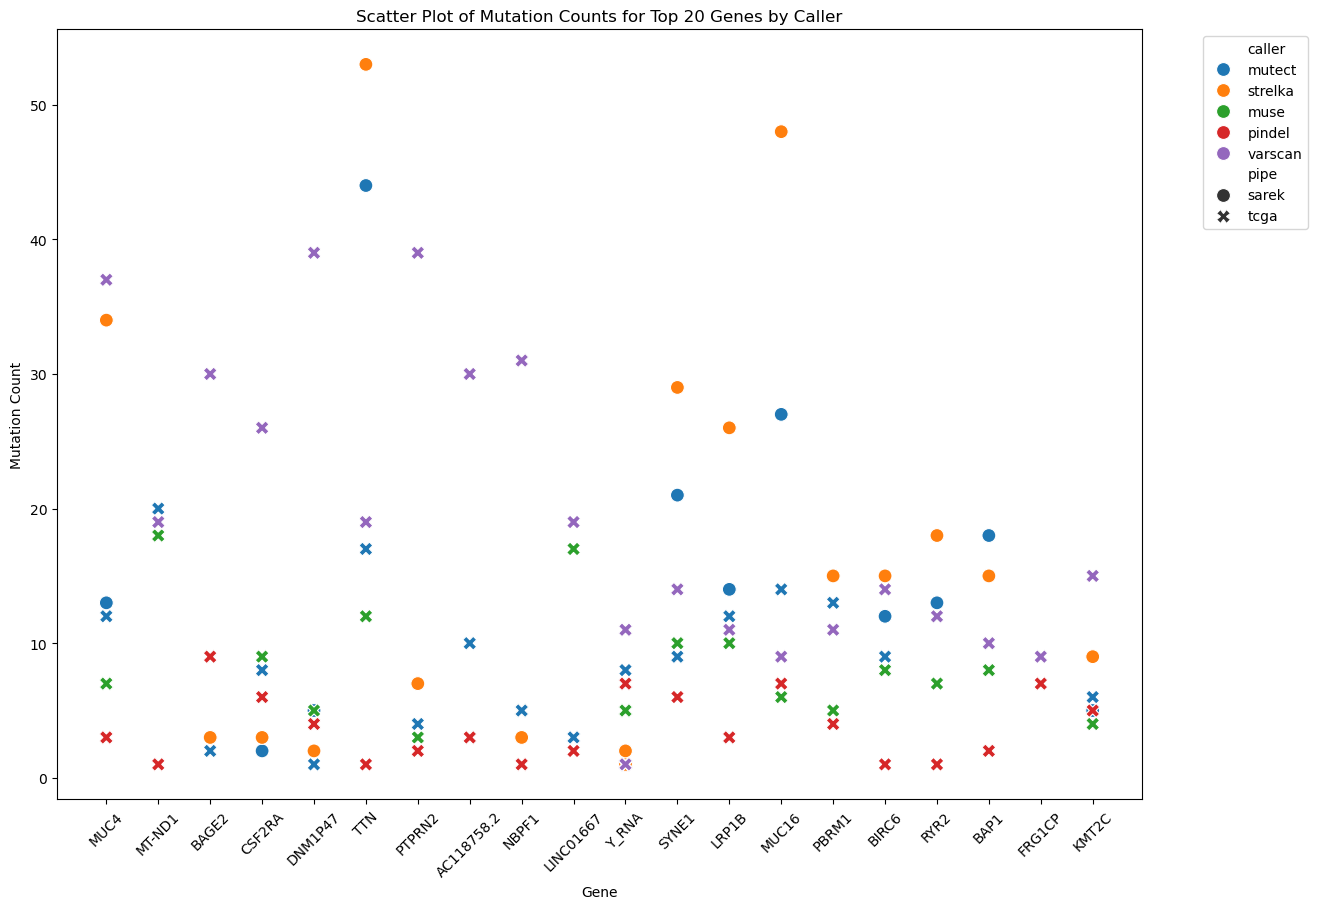

In [129]:
top_tcga = genes[genes['Hugo_Symbol'].isin(top_20_genes_tcga.index.tolist())]
# Ensure the order of genes in the plot reflects the order in top_10_genes
top_tcga['Hugo_Symbol'] = pd.Categorical(top_tcga['Hugo_Symbol'], categories=top_20_genes_tcga.index.tolist(), ordered=True)

plt.figure(figsize=(14, 10))
sns.scatterplot(data=top_tcga, x='Hugo_Symbol', y='Mutation_Count', hue='caller', style='pipe', s=100)
plt.title('Scatter Plot of Mutation Counts for Top 20 Genes by Caller')
plt.xlabel('Gene')
plt.ylabel('Mutation Count')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [132]:
callers = sarek['caller'].unique()
# Find genes that are reported by all callers
genes_reported_by_all_callers_sarek = sarek.groupby('Hugo_Symbol').filter(lambda x: set(callers).issubset(set(x['caller'])))
top_20_genes_sarek = genes_reported_by_all_callers_sarek.groupby('Hugo_Symbol')['Mutation_Count'].sum().nlargest(20)
top_20_genes_sarek

Hugo_Symbol
TTN         97
MUC16       75
MUC19       51
SYNE1       50
MUC4        47
DST         42
DNAH17      41
MACF1       41
HMCN1       40
LRP1B       40
OBSCN       39
NEB         37
TTC3        35
HLA-DRB1    34
BAP1        33
COL5A1      33
MUC5B       33
AHNAK2      32
KMT2D       32
HERC4       31
Name: Mutation_Count, dtype: int64

/var/folders/6r/tg5ddtfd68l0twgv17dznsj40000gp/T/ipykernel_72641/3134474868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_sarek['Hugo_Symbol'] = pd.Categorical(top_sarek['Hugo_Symbol'], categories=top_20_genes_sarek.index.tolist(), ordered=True)


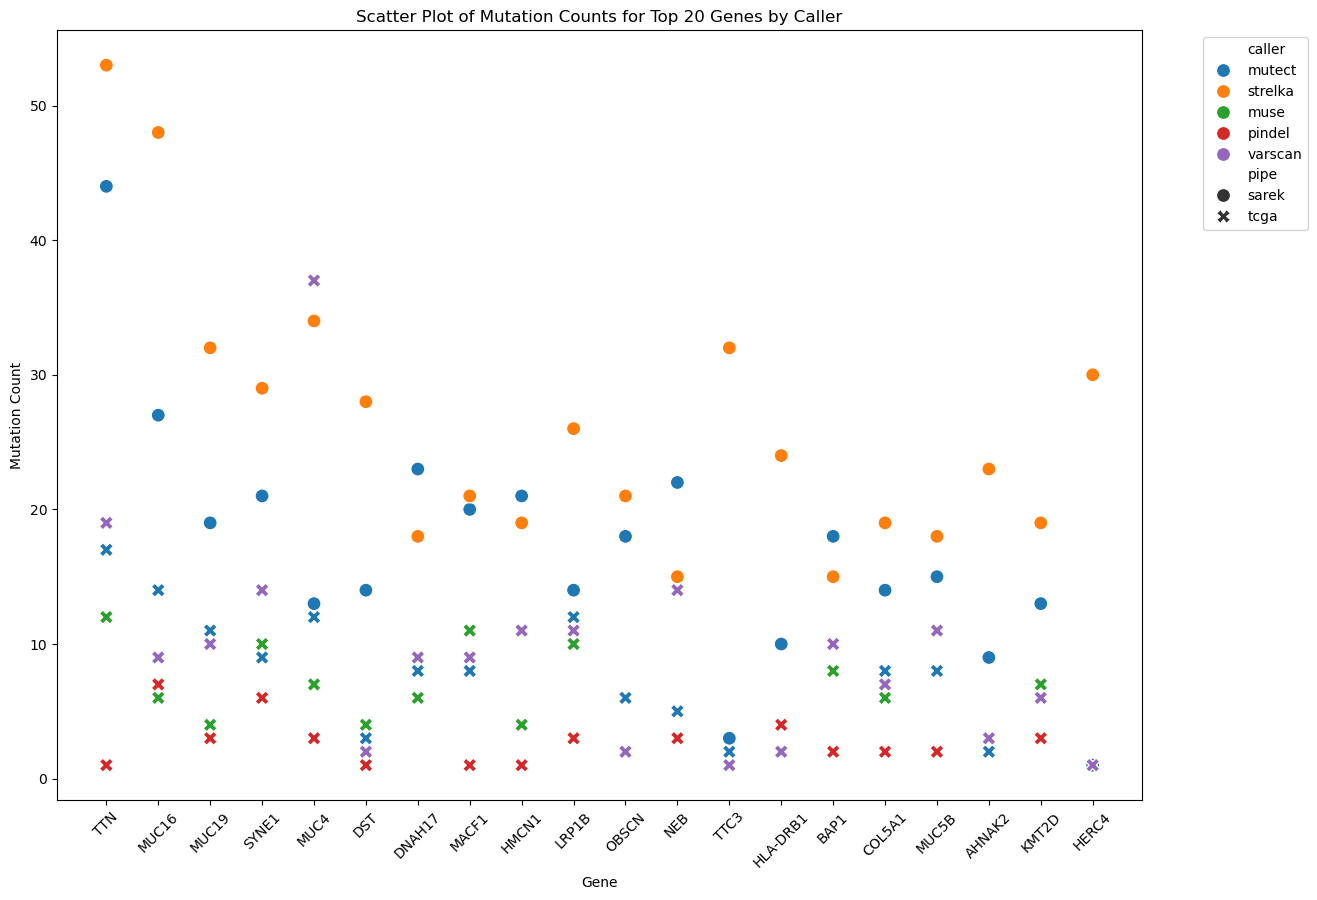

In [133]:
top_sarek = genes[genes['Hugo_Symbol'].isin(top_20_genes_sarek.index.tolist())]
# Ensure the order of genes in the plot reflects the order in top_10_genes
top_sarek['Hugo_Symbol'] = pd.Categorical(top_sarek['Hugo_Symbol'], categories=top_20_genes_sarek.index.tolist(), ordered=True)

plt.figure(figsize=(14, 10))
sns.scatterplot(data=top_sarek, x='Hugo_Symbol', y='Mutation_Count', hue='caller', style='pipe', s=100)
plt.title('Scatter Plot of Mutation Counts for Top 20 Genes by Caller')
plt.xlabel('Gene')
plt.ylabel('Mutation Count')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()